<a href="https://colab.research.google.com/github/bruno-albino/exploratory-analysis-ifsp/blob/main/Machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Top 8800 Twitch Streamers**


### Top of the best streams based on watch time.

###### Nome: Bruno da Silva Albino CP: 300273X
###### Nome: Eduardo Bueno CP: 300273X
---


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Disciplina: Inteligência Artificial

Professor: Samuel Martins


---



In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# estilos padrão para os plots/visualizações
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

### **1. Dataset**
----
Dataset: Top 8800 Twitch Streamers: https://www.kaggle.com/girlazo/top-8800-twitch-*streamers*

Este dataset possui 8800 linhas, listando os melhores streamers do mundo na plataforma de stream Twitch, baseado em tempo assistido pelos usuários. Cada registro possui o nome do streamer, a quantidaded de vies e assinantes do canal, e outras informações como os três jogos mais jogados de cada streamer




#### **1.1 Importando o Dataset**

In [5]:
data = pd.read_csv('/content/drive/MyDrive/TwitchDataSetProcessado.csv')

In [ ]:
data.head()

In [ ]:
data.info

#### **1.2 Informações básicas do dataset**

In [ ]:
print(f'O dataset possui {data.shape[0]} exemplos/observações/amostras/linhas e {data.shape[1]} atributos/características/variáveis/colunas')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8389 entries, 0 to 8388
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   topCount         8389 non-null   int64 
 1   screenName       8389 non-null   object
 2   watchTime        8389 non-null   int64 
 3   streamTime       8389 non-null   int64 
 4   peakViewers      8389 non-null   int64 
 5   averageViewers   8389 non-null   int64 
 6   followers        8389 non-null   int64 
 7   followersGained  8389 non-null   int64 
 8   viewsGained      8389 non-null   int64 
 9   mature           8389 non-null   bool  
 10  language         8389 non-null   object
 11  firstCategory    8389 non-null   object
 12  secondCategory   8389 non-null   object
 13  thirdCategory    8389 non-null   object
dtypes: bool(1), int64(8), object(5)
memory usage: 860.3+ KB


**watchTime, followers e viewsGained** são variáveis dependentes e todas as demais são variáveis independentes.

#### **1.3 Estatísticas Descritivas**

In [18]:
data.describe().round(2)

,topCount,watchTime,streamTime,peakViewers,averageViewers,followers,followersGained,viewsGained
count,8389.00,8.389000e+03,8389.00,8389.00,8389.00,8389.00,8389.00,8.389000e+03
mean,4394.24,7.659037e+07,87237.88,9303.67,1099.86,145144.44,60731.00,2.473236e+06
std,2536.45,2.376042e+08,64151.71,25539.45,2893.57,395978.34,163685.48,9.633958e+06
min,1.00,8.827995e+06,150.00,75.00,16.00,119.00,-178570.00,1.982000e+03
25%,2202.00,1.307338e+07,45570.00,1550.00,174.00,23273.00,7692.00,3.619410e+05
50%,4388.00,2.230203e+07,78450.00,3423.00,351.00,53333.00,19513.00,7.697760e+05
75%,6585.00,5.232114e+07,114345.00,8212.00,894.00,132782.00,53467.00,2.103522e+06
max,8800.00,7.333609e+09,521115.00,1016962.00,89278.00,16042584.00,4681567.00,6.848357e+08


0 watchTime
1 followers
2 viewsGained


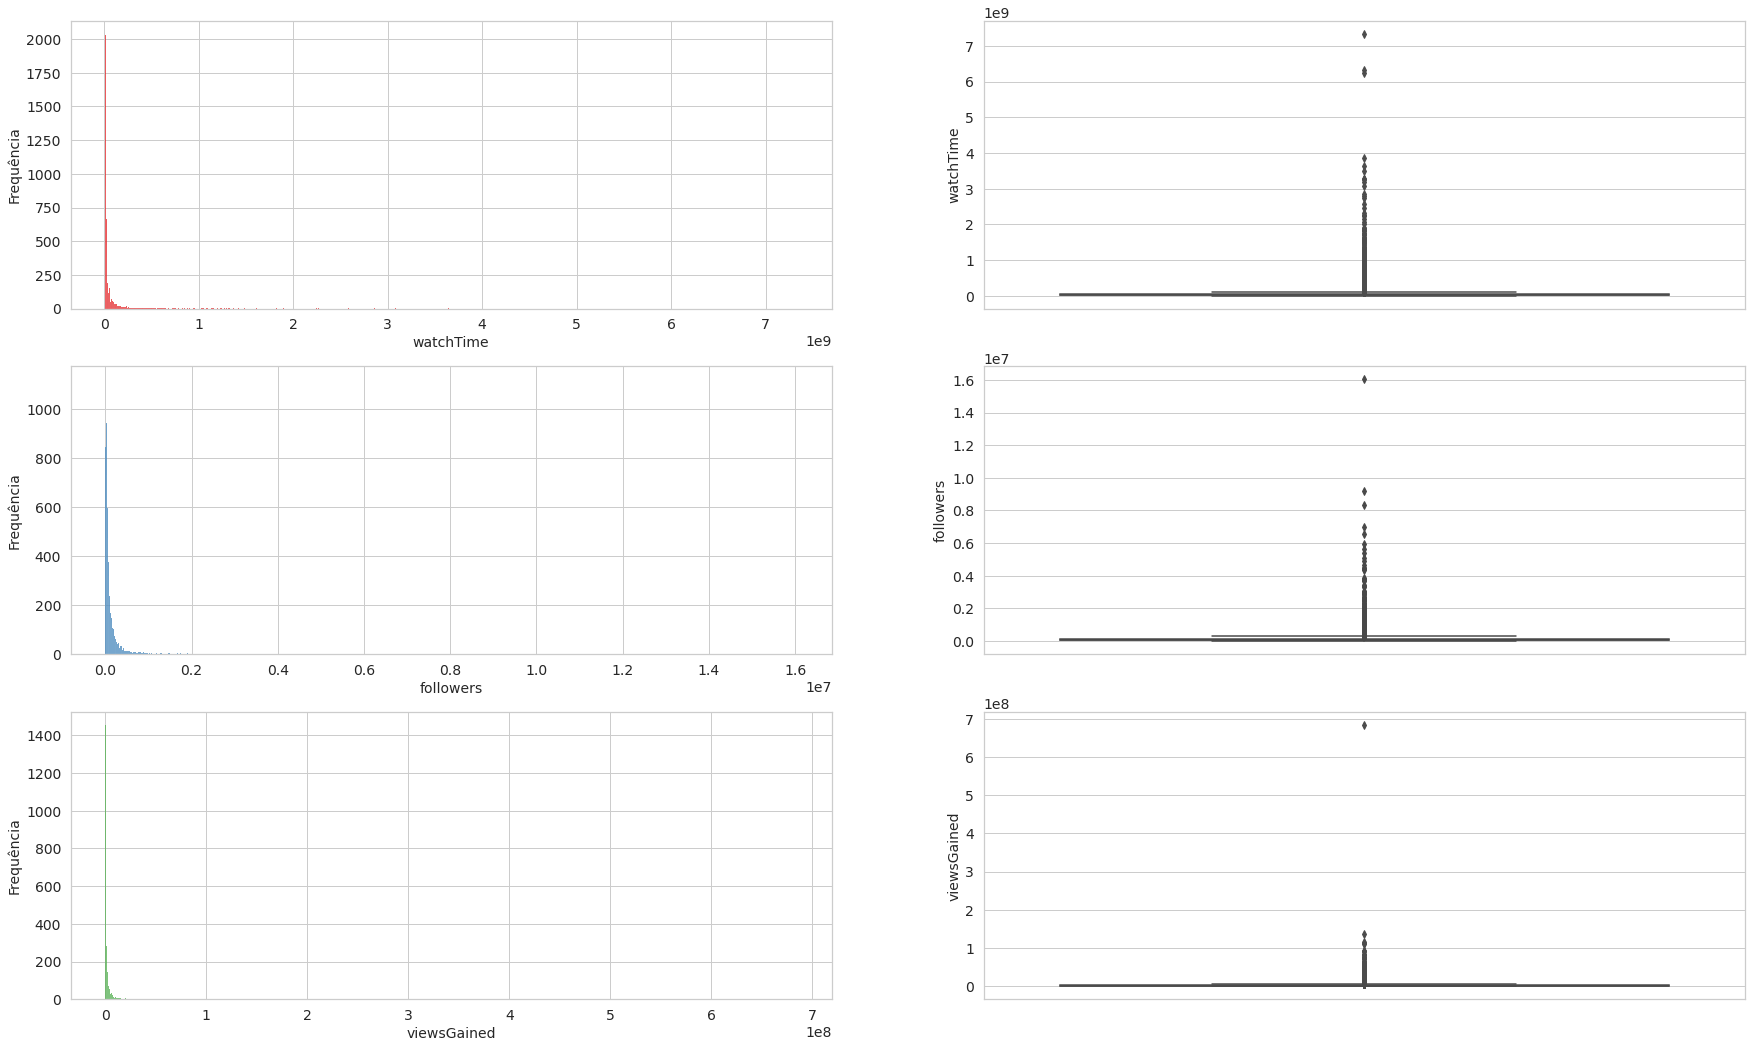

In [22]:
import matplotlib.cm as cm
cmap = cm.get_cmap('Set1').colors  # color map

fig = plt.figure(figsize=(30, 18))

atributos = ['watchTime', 'followers', 'viewsGained']
n_atributos = len(atributos)

for idx, atributo in enumerate(atributos):
    print(idx, atributo)
    axis_1 = fig.add_subplot(n_atributos, 2, 2*idx + 1)
    axis_1.set_xlabel(atributo)
    axis_1.set_ylabel('Frequência')
    sns.histplot(data=data, x=atributo, ax=axis_1, color=cmap[idx])

    axis_2 = fig.add_subplot(n_atributos, 2, 2*idx + 2)
    sns.boxplot(data=data, y=atributo, ax=axis_2, color=cmap[idx])


### **2. Análise**

#### **2.1 Analisando as Categorias de jogos (Variável Categórica)**

Proporção de observações por Jogo

In [31]:
data.groupby('firstCategory').size()

firstCategory
7 Days to Die                            11
ARK: Survival Evolved                    21
ASMR                                     32
Age of Empires II: Definitive Edition    17
Albion Online                             9
                                         ..
Yu-Gi-Oh! Saikyo Card Battle              2
eBaseball Powerful Pro Yakyū 2020         2
eFootball PES 2020                        2
iRacing                                  19
osu!                                     10
Length: 393, dtype: int64

In [36]:
data.groupby('firstCategory')['watchTime'].describe()


,count,mean,std,min,25%,50%,75%,max
firstCategory,,,,,,,,
7 Days to Die,11.0,1.963324e+07,8.619656e+06,8914095.0,13071742.50,18757890.0,24787335.00,36122595.0
ARK: Survival Evolved,21.0,2.007364e+07,1.179068e+07,9294750.0,10925970.00,15385785.0,28336785.00,58319385.0
ASMR,32.0,2.284483e+07,1.692817e+07,8952465.0,12183296.25,18562567.5,23066437.50,75051345.0
Age of Empires II: Definitive Edition,17.0,6.401046e+07,7.275692e+07,8939145.0,22132830.00,37567440.0,90334410.00,305562645.0
Albion Online,9.0,1.314042e+07,4.354690e+06,8872905.0,9288720.00,13196895.0,15587415.00,20150805.0
...,...,...,...,...,...,...,...,...
Yu-Gi-Oh! Saikyo Card Battle,2.0,4.079639e+07,2.860118e+07,20572305.0,30684348.75,40796392.5,50908436.25,61020480.0
eBaseball Powerful Pro Yakyū 2020,2.0,5.025609e+07,5.742991e+07,9647010.0,29951550.00,50256090.0,70560630.00,90865170.0
eFootball PES 2020,2.0,2.269654e+07,3.557433e+06,20181060.0,21438802.50,22696545.0,23954287.50,25212030.0
